# Notebook Project Probabilistic view in linguistic variation

In [3]:
import os
os.sys.path.append('../project_code')

from data.bhsa import book_sets, get_data
from markov.Markov_Chain import *
from PCA.PCA import * 
from Clustering.Clustering_analysis import *
from Distance.Distances import *
from Frequency.Occurences import *
from scipy.cluster.hierarchy import cophenet
from Figures.Raw_Transformed import * 

test = get_data(books=["sbh","lbh"])#
features = {'clause_types', 'phrase_functions', 'phrase_types', 'word_pos'}
domain = {'N', 'Q', 'D'}

In [2]:
 test["phrase_functions"]["N"]["Genesis"][:10]

[['Conj', 'Pred', 'Subj'],
 ['Conj', 'Pred', 'Subj'],
 ['Conj', 'Pred', 'Subj', 'Objc'],
 ['Conj', 'Pred'],
 ['Conj', 'Pred', 'Subj', 'Cmpl'],
 ['Conj', 'Pred', 'Subj', 'Cmpl', 'Objc'],
 ['Conj', 'Cmpl', 'Pred', 'Objc'],
 ['Conj', 'Pred', 'Subj'],
 ['Conj', 'Pred', 'Subj'],
 ['PreC']]

# Transitions

In [4]:
data_raw = collections.defaultdict(dict)
data_trans = collections.defaultdict(dict)

for f in features:
    for d in domain:
        if f != "clause_types": 
            transMatrix = transitionMatrix(test[f][d], True) 
        else:
            transMatrix = transitionMatrix(test[f][d], False) 
            
        if len(transMatrix.keys())>0: 
            
            transDict = df_dict_Transformation(transMatrix)
            data_raw[f][d] = pd.DataFrame(transDict).fillna(0)
            
            transMatrix = MCTransformation(transMatrix)

            transDict = df_dict_Transformation(transMatrix)
            data_trans[f][d] = pd.DataFrame(transDict).fillna(0)     
stack_Data = stackTransitions(data_trans, features, "N")

# Example Dataset

In [4]:
data_trans["phrase_functions"]["N"].head()

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
Adju->Adju,0.094247,0.023907,0.052363,0.053132,0.019695,0.010436,0.050736,0.017685,0.035840,0.038272,0.068907,0.026496,0.040434,0.004808,0.070684
Adju->Clause_Begin,0.000079,0.000049,0.000046,0.000045,0.000050,0.000059,0.000195,0.000222,0.000061,0.000263,0.000030,0.000072,0.000057,0.000337,0.000125
Adju->Clause_End,0.106453,0.065527,0.026919,0.113144,0.059598,0.043501,0.087726,0.102172,0.083689,0.118373,0.034070,0.062346,0.029562,0.050705,0.074816
Adju->Cmpl,0.050466,0.008085,0.005658,0.033322,0.013530,0.012159,0.009371,0.028612,0.003715,0.027928,0.007253,0.013643,0.017463,0.013393,0.010679
Adju->Conj,0.000119,0.000070,0.000056,0.000064,0.000067,0.000072,0.000294,0.000345,0.000082,0.000524,0.000038,0.000101,0.000070,0.000453,0.000190


## Transitions transformation

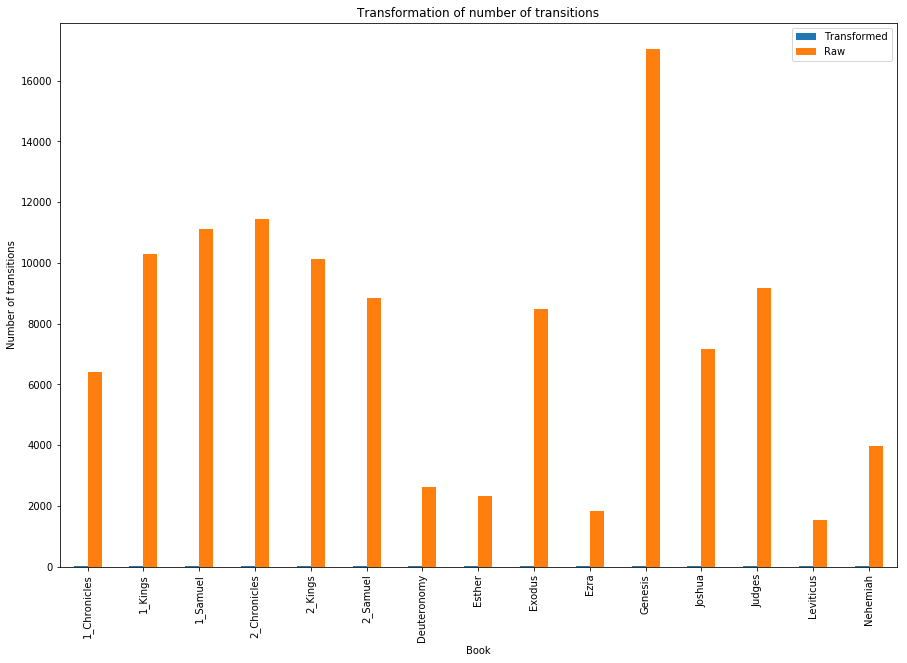

In [5]:
sums_Trans = data_trans["phrase_functions"]["N"].sum()
sums_raw = data_raw["phrase_functions"]["N"].sum()
raw_transPictures(sums_Trans,sums_raw)

# Hierarchical Clustering


Distance measures: 'canberra', 'braycurtis', 'cityblock', 'chebyshev', 'cosine', 'correlation', 'euclidean', 'sqeuclidean'

Linkage methods: 'average', 'centroid', 'complete', 'median', 'single', 'ward', 'weighted'

## Example 1

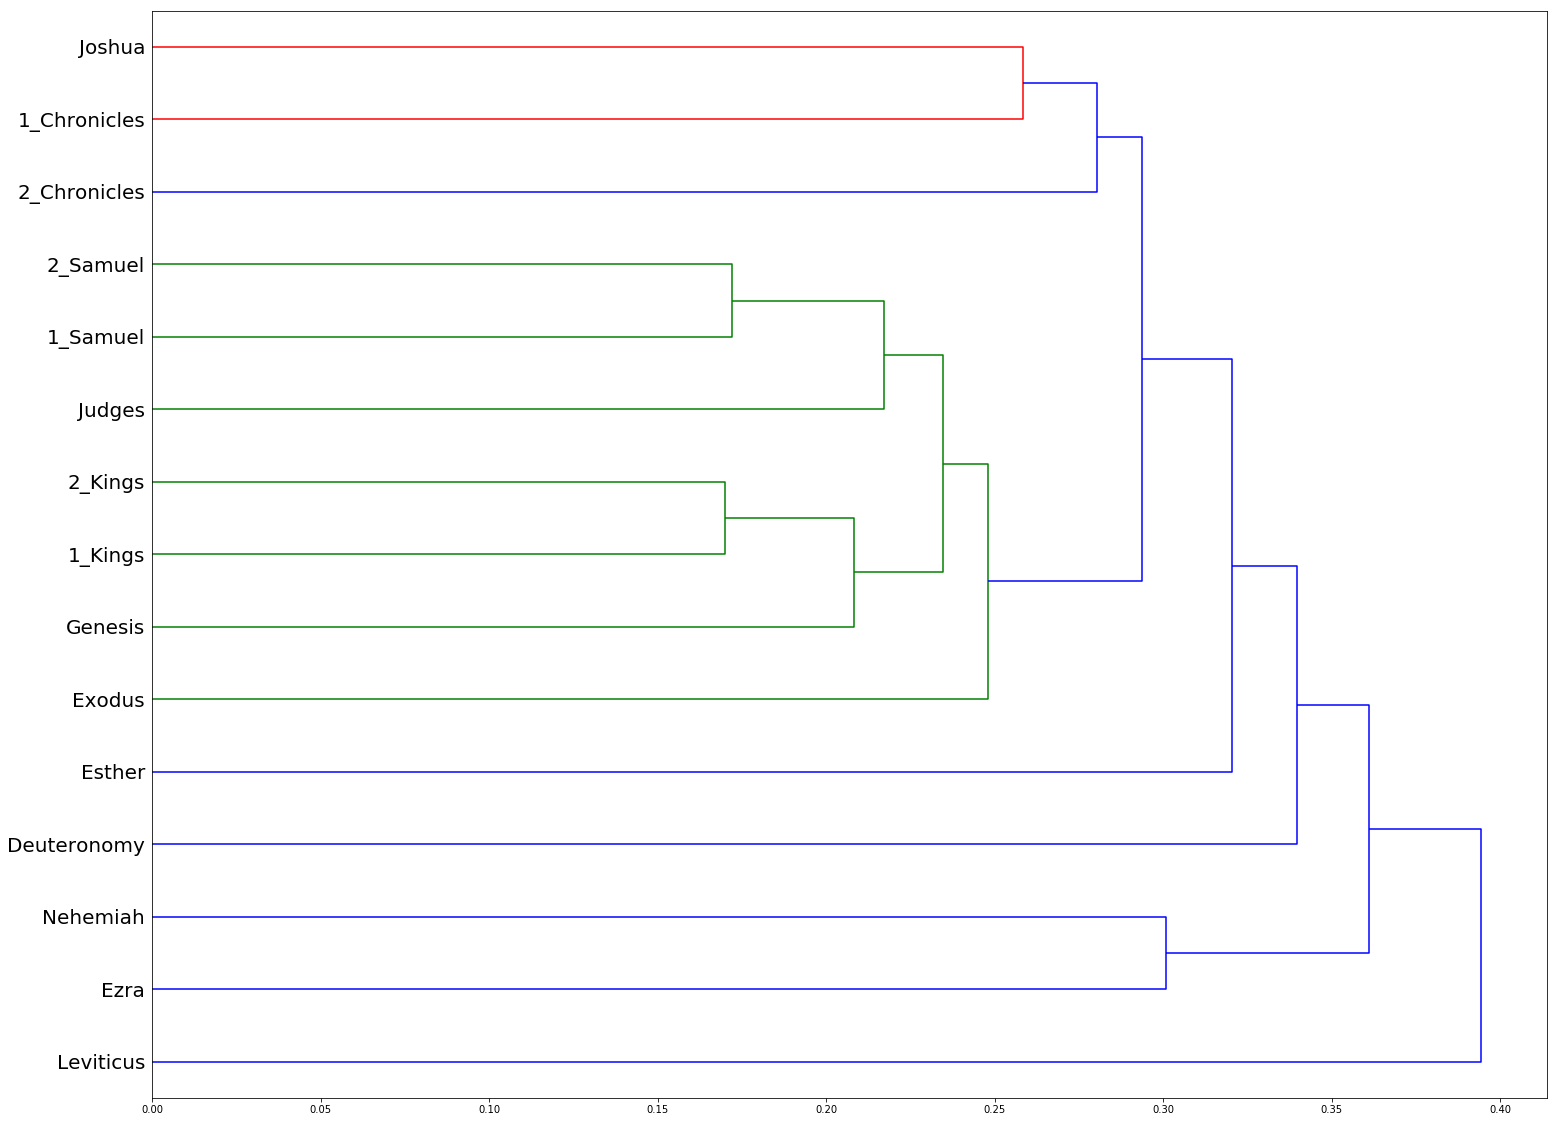

In [15]:
metric = "braycurtis" 
linkage = "weighted"
data = data_trans["phrase_functions"]["N"]

distancemetric = matrixDistances(data.T.values, metric)
Z = linkageFunction(distancemetric,linkage)
dendogramPlot(Z, data.keys())

## Example 2

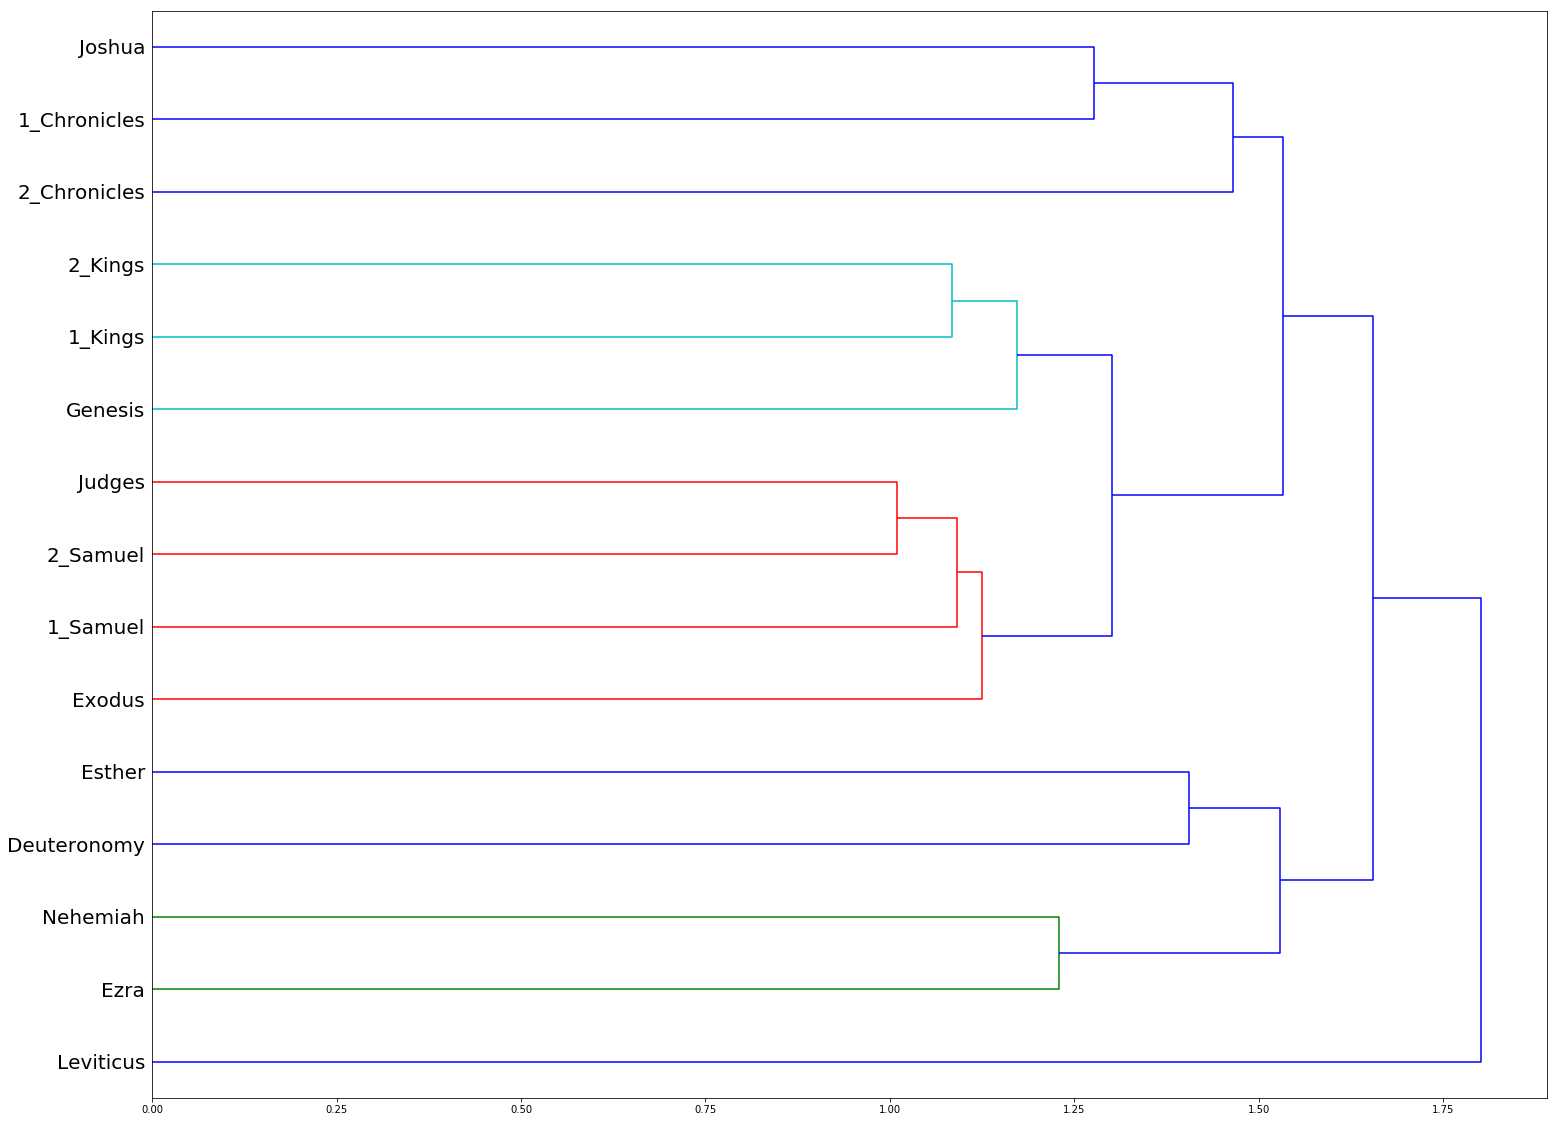

In [16]:
metric = "euclidean"
linkage = "average"
data = data_trans["phrase_functions"]["N"]

distancemetric = matrixDistances(data.T.values, metric)
Z = linkageFunction(distancemetric, linkage)
dendogramPlot(Z, data.keys())

## Clustering Analysis

## Narrative

In [17]:
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["N"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat

In [18]:
df_Results = pd.DataFrame(results, index = data.keys()).T 
df_Results.head(10)

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
clause_types|braycurtis|average,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|braycurtis|centroid,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|braycurtis|complete,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|braycurtis|median,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|braycurtis|single,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|braycurtis|ward,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|braycurtis|weighted,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|canberra|average,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
clause_types|canberra|centroid,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
clause_types|canberra|complete,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2


# Jaccard distance: 1-agreeement / Total

In [19]:
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
pd.DataFrame(squareFormFunction(distancemetric), index = data.keys(),columns = data.keys())

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah
1_Chronicles,0.000000,0.183036,0.209821,0.111607,0.196429,0.209821,0.133929,0.214286,0.187500,0.111607,0.218750,0.120536,0.223214,0.629464,0.107143
1_Kings,0.183036,0.000000,0.035714,0.116071,0.013393,0.035714,0.138393,0.316964,0.013393,0.294643,0.035714,0.089286,0.049107,0.678571,0.129464
1_Samuel,0.209821,0.035714,0.000000,0.098214,0.022321,0.000000,0.120536,0.325893,0.022321,0.321429,0.026786,0.098214,0.013393,0.651786,0.138393
2_Chronicles,0.111607,0.116071,0.098214,0.000000,0.102679,0.098214,0.040179,0.227679,0.120536,0.223214,0.125000,0.080357,0.111607,0.598214,0.066964
2_Kings,0.196429,0.013393,0.022321,0.102679,0.000000,0.022321,0.125000,0.330357,0.026786,0.308036,0.022321,0.102679,0.035714,0.665179,0.142857
2_Samuel,0.209821,0.035714,0.000000,0.098214,0.022321,0.000000,0.120536,0.325893,0.022321,0.321429,0.026786,0.098214,0.013393,0.651786,0.138393
Deuteronomy,0.133929,0.138393,0.120536,0.040179,0.125000,0.120536,0.000000,0.241071,0.142857,0.236607,0.147321,0.084821,0.133929,0.584821,0.062500
Esther,0.214286,0.316964,0.325893,0.227679,0.330357,0.325893,0.241071,0.000000,0.321429,0.227679,0.352679,0.245536,0.339286,0.763393,0.214286
Exodus,0.187500,0.013393,0.022321,0.120536,0.026786,0.022321,0.142857,0.321429,0.000000,0.299107,0.031250,0.075893,0.035714,0.665179,0.133929
Ezra,0.111607,0.294643,0.321429,0.223214,0.308036,0.321429,0.236607,0.227679,0.299107,0.000000,0.330357,0.223214,0.334821,0.651786,0.191964


# Cophenet Correlation: Which method clusters most accurate the distances

Correlation: 1 is good relation, 0 is no relation

In [20]:
for method in clusterMethods:
    Z = linkageFunction(distancemetric, method)
    rho, ar = cophenet(Z,distancemetric)
    print(method, rho)

ward 0.940023740763
centroid 0.978202604748
complete 0.967501168004
single 0.959127364415
weighted 0.973580298178
average 0.97391187593
median 0.969937475724


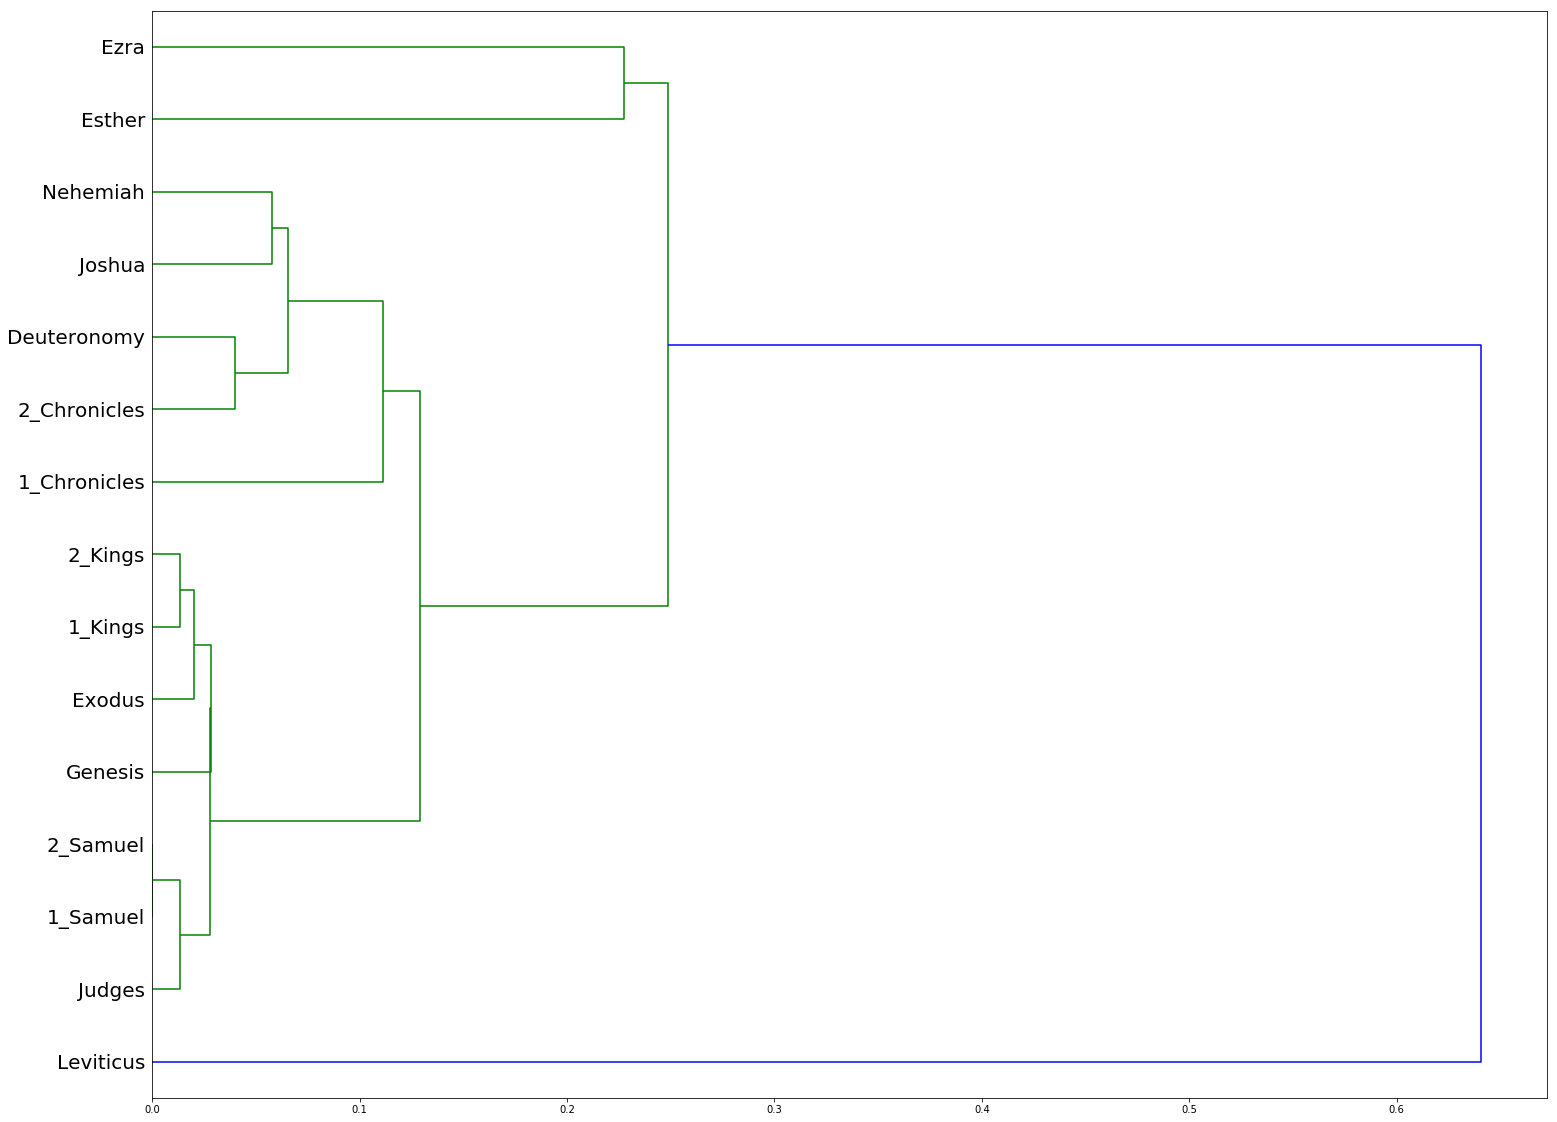

In [23]:
Z = linkageFunction(distancemetric, "centroid")
dendogramPlot(Z, data.keys())

# Clustering with Discourse

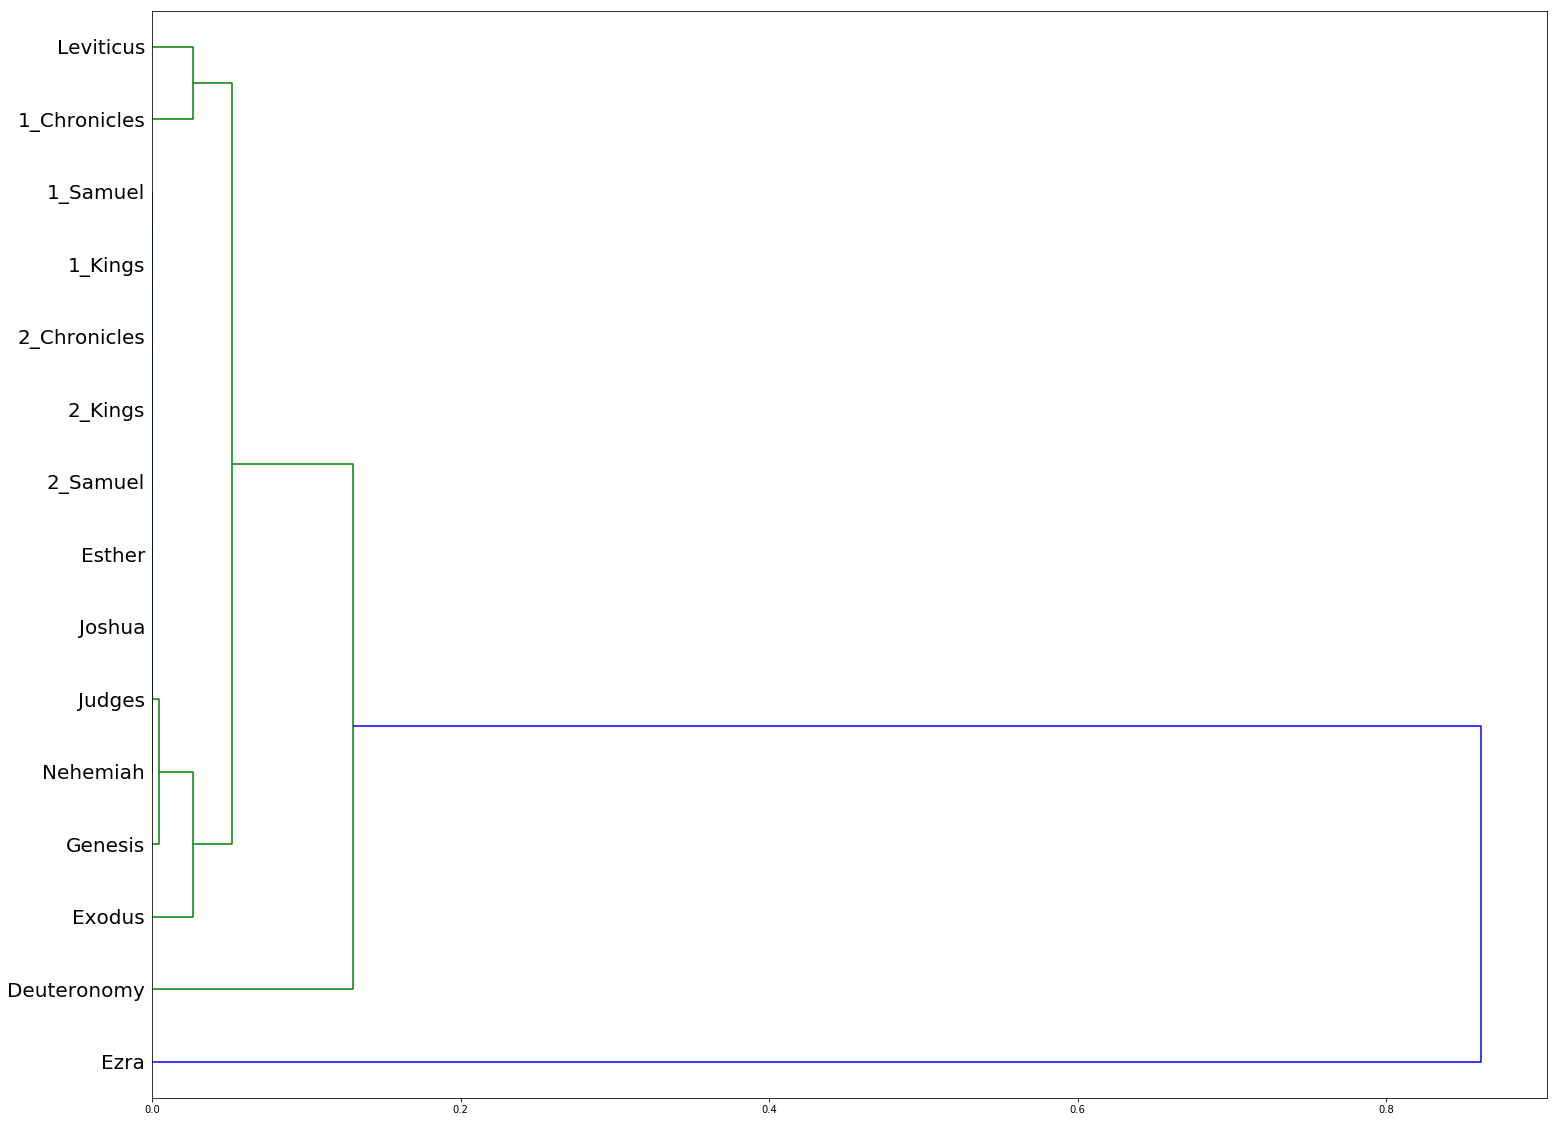

In [13]:
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["D"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat
df_Results = pd.DataFrame(results, index = data.keys()).T 
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
Zd = linkageFunction(distancemetric, "average")
dendogramPlot(Zd, data.keys())

## Clustering with Narrative and Discourse

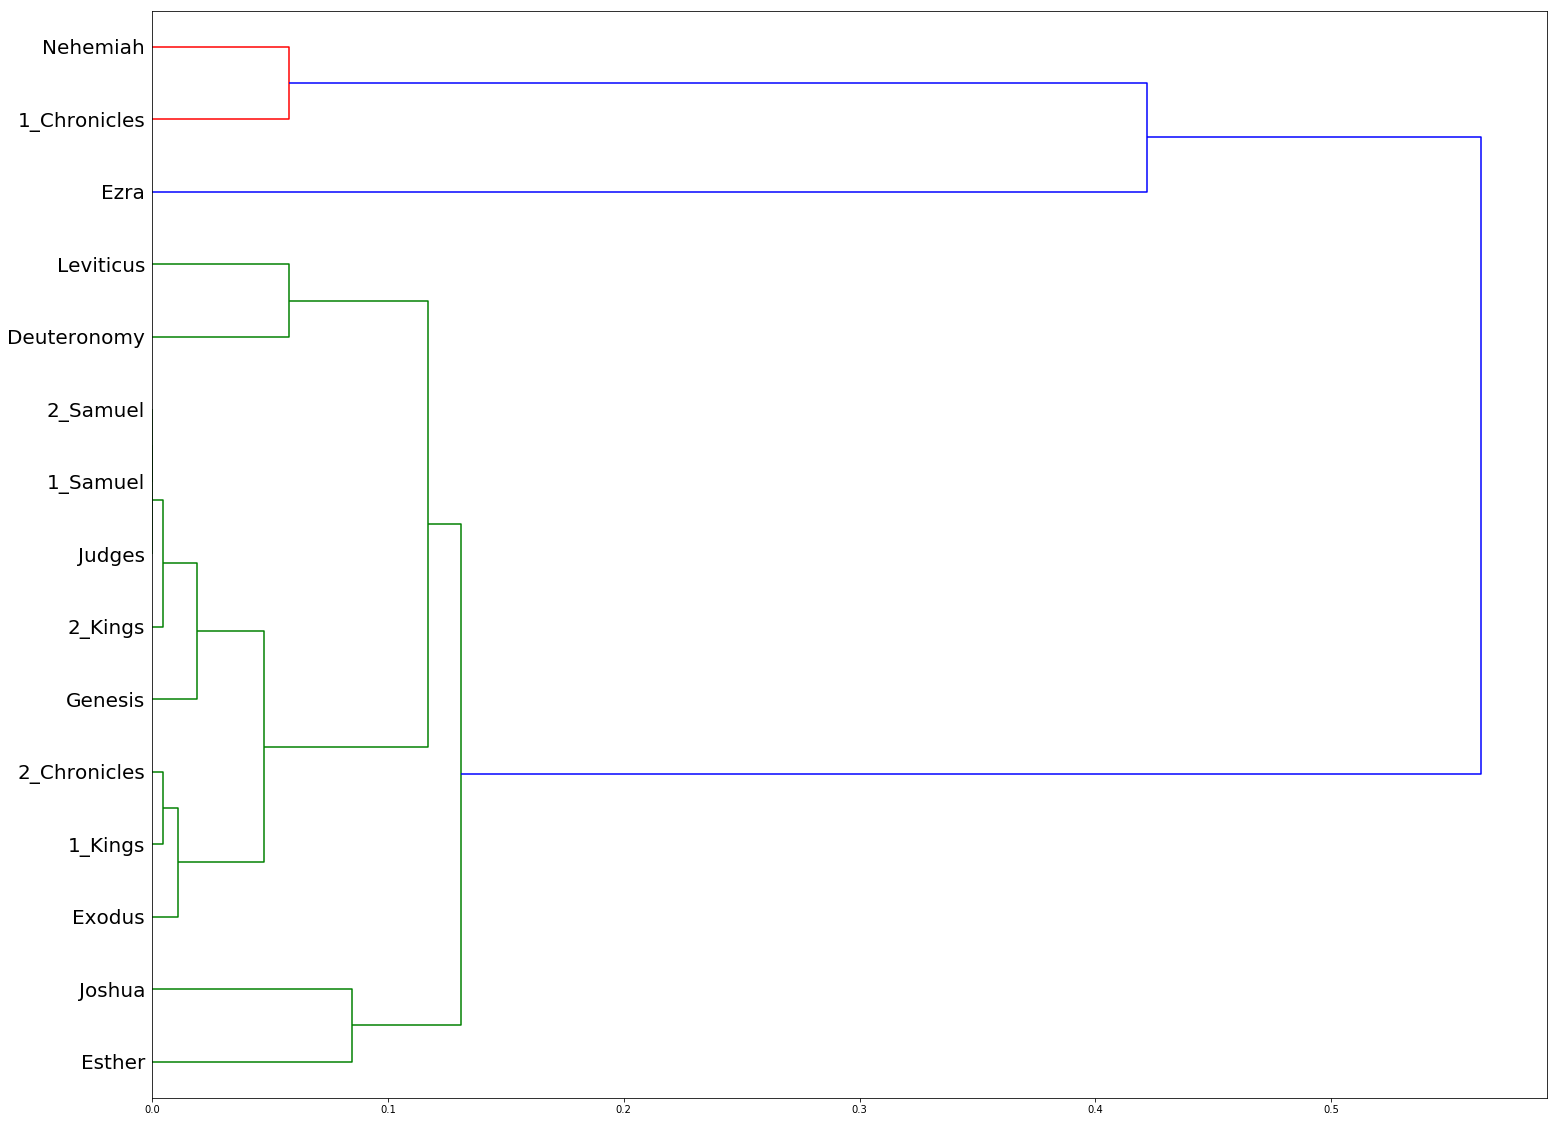

In [14]:
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["D","N"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat
df_Results = pd.DataFrame(results, index = data.keys()).T 
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
Zd = linkageFunction(distancemetric, "average")
dendogramPlot(Zd, data.keys())

# PCA

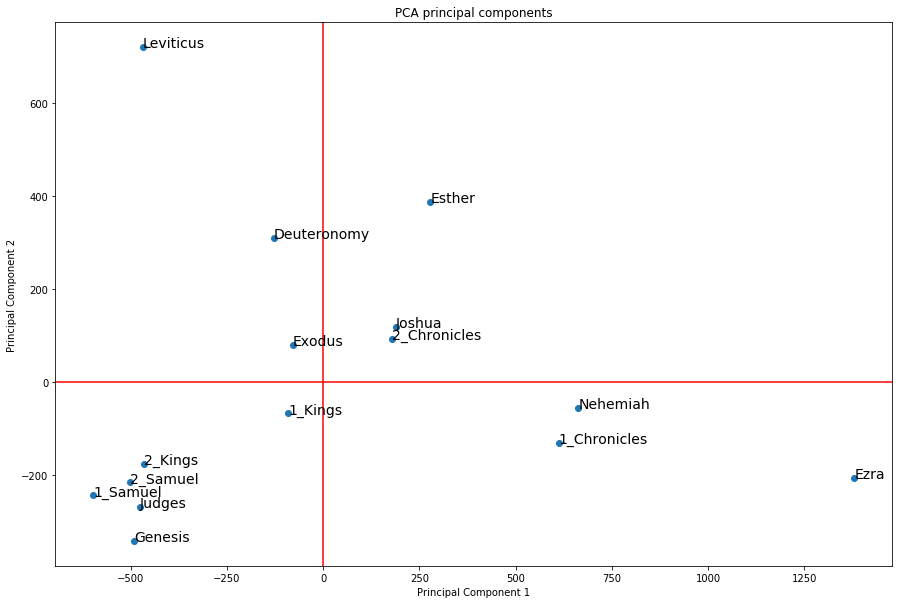

In [15]:
pca = PCA(n_components=2)
fit = pca.fit_transform(stack_Data.T.values) 
plt.figure(1, figsize=(15, 10))     
plt.scatter(fit[:, 0], fit[:, 1])
books = stack_Data.keys()
for i, book in enumerate(books):
    plt.annotate(book, xy=(fit[i, 0], fit[i, 1]), fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x=0, color="r", linestyle='-')
plt.title("PCA principal components")
plt.show()

# Prediction of Ruth and Jonah ?

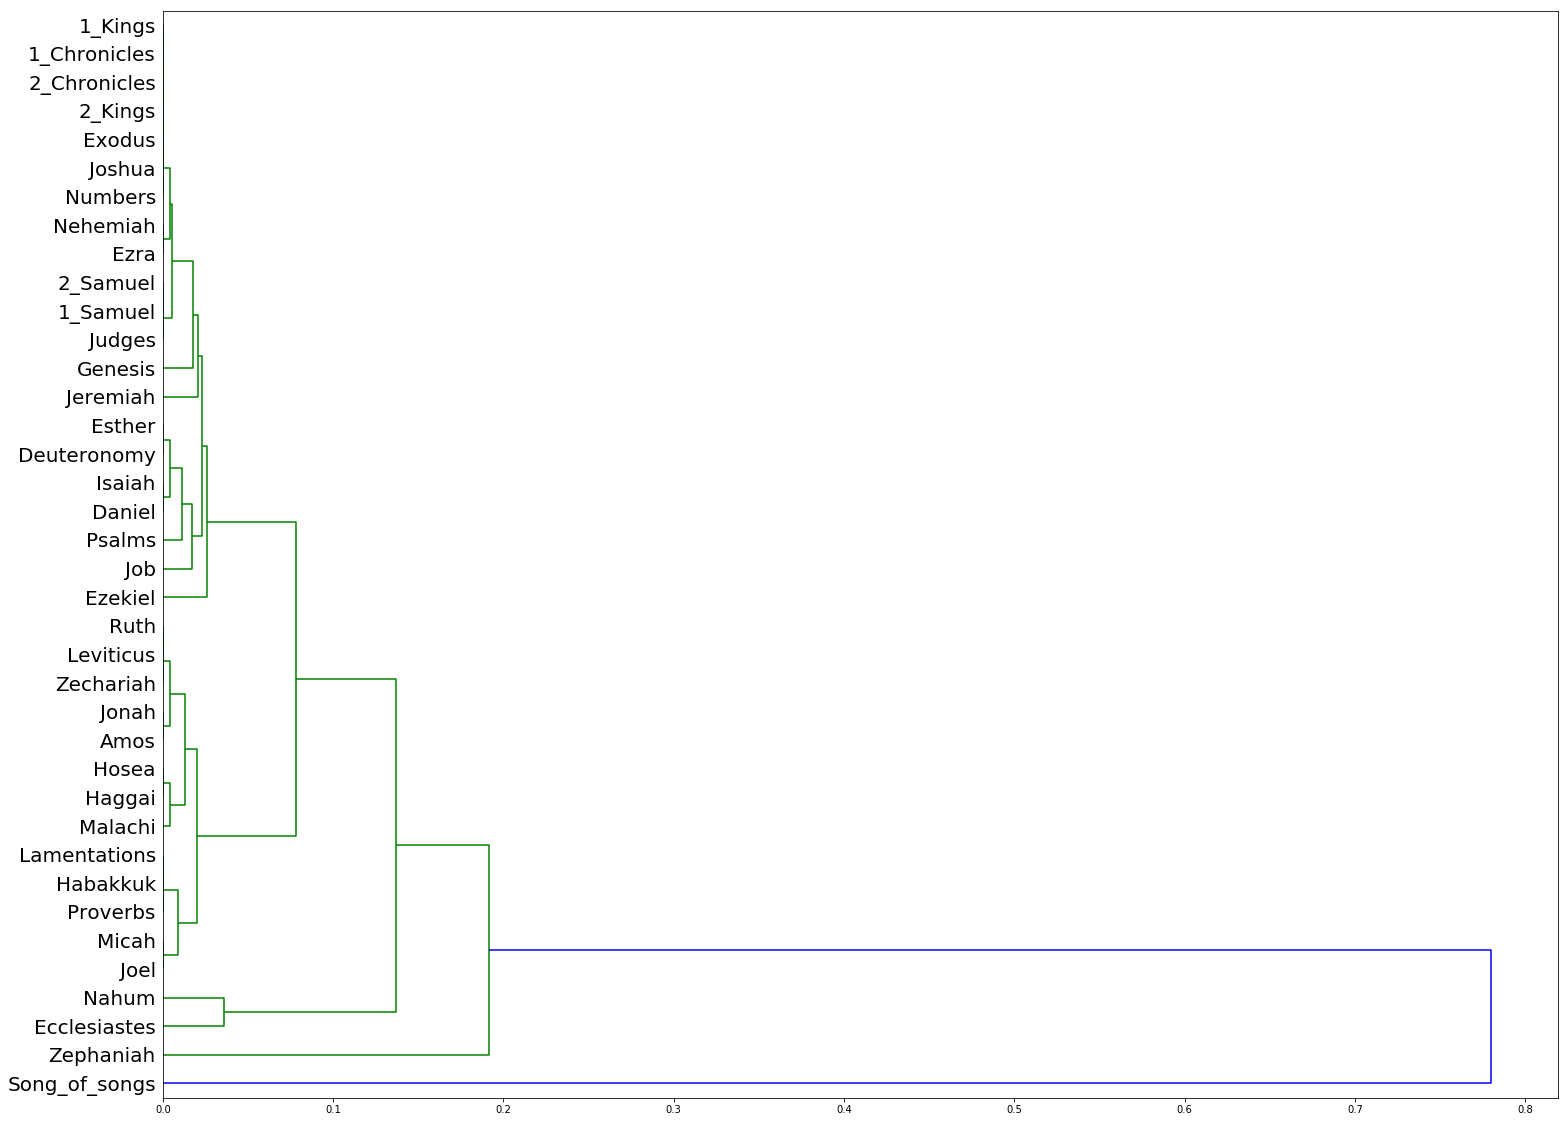

In [25]:
test = get_data(books="all")#
data_raw = collections.defaultdict(dict)
data_trans = collections.defaultdict(dict)

for f in features:
    for d in domain:
        if f != "clause_types": 
            transMatrix = transitionMatrix(test[f][d], True) 
        else:
            transMatrix = transitionMatrix(test[f][d], False) 
        if len(transMatrix.keys())>0: 
            
            transDict = df_dict_Transformation(transMatrix)
            data_raw[f][d] = pd.DataFrame(transDict).fillna(0)
            
            transMatrix = averageTransformation(transMatrix) #Here, transformations can be performed
            transDict = df_dict_Transformation(transMatrix)
            data_trans[f][d] = pd.DataFrame(transDict).fillna(0)     
stack_Data = stackTransitions(data_trans, features, "N")
nClusters = 2

results = collections.defaultdict(dict)
for f in features:
    for metric in simpleMetric:
        for method in clusterMethods:
            for d in ["N"]:
                if not data_trans[f][d].empty:
                    distancemetric = matrixDistances(data_trans[f][d].T.values, metric)
                    distancemetric = np.nan_to_num(distancemetric)
                    Z = linkageFunction(distancemetric, method)
                    flat = flattenClustering(Z, nClusters, "maxclust")
                    tag = f+ "|" + metric +"|" +method
                    results[tag] = flat


df_Results = pd.DataFrame(results).T 
distancemetric = matrixDistances(df_Results.T.values, "jaccard")
Zd = linkageFunction(distancemetric, "average")
dendogramPlot(Zd, stack_Data.keys())
